## Pertemuan 8 (10)

In [2]:
ls /b

.ipynb_checkpoints
DataBaru.csv
Pertemuan_10.ipynb


#### Fuzy C-Means dengan k = 3

In [14]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 1. Baca data dari file CSV
# Ganti 'data.csv' dengan nama file Anda
file_path = 'DataBaru.csv'  # Masukkan path file CSV Anda
data = pd.read_csv(file_path)

# Asumsi data memiliki dua kolom numerik untuk clustering
# Ganti "col1" dan "col2" dengan nama kolom dalam dataset Anda
x = data["second"].values
y = data["pvpwr"].values
data_matrix = np.vstack((x, y))

# 2. Set parameter untuk FCM
n_clusters = 3    # Jumlah cluster
error = 0.005     # Toleransi error
max_iter = 300    # Iterasi maksimum

# 3. Lakukan clustering dengan FCM
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    data_matrix, n_clusters, m=2, error=error, maxiter=max_iter, init=None
)

# 4. Hasil clustering
cluster_membership = np.argmax(u, axis=0)  # Tentukan cluster tiap data

# Tambahkan hasil clustering ke data asli untuk analisis
data['Cluster'] = cluster_membership


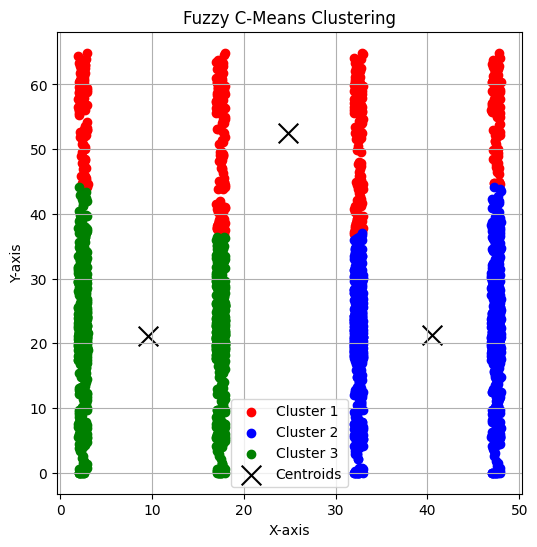

In [15]:
# 5. Visualisasi hasil clustering
colors = ['red', 'blue', 'green', 'purple', 'orange']

plt.figure(figsize=(6,6))
for i in range(n_clusters):
    plt.scatter(data_matrix[0, cluster_membership == i],
                data_matrix[1, cluster_membership == i],
                c=colors[i], label=f'Cluster {i+1}')

# Plot centroid cluster
plt.scatter(cntr[:, 0], cntr[:, 1], s=200, c='black', marker='x', label='Centroids')

plt.title('Fuzzy C-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid()
plt.show()

In [16]:
# 6. Simpan file (Opsional)

output_file = 'clustered_data.csv'
data.to_csv(output_file, index = False)
print(f"Hasil clustering disimpan ke  {output_file}")

Hasil clustering disimpan ke  clustered_data.csv
